In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Importing dataset
from sklearn.datasets import load_wine

In [2]:
k = 3 # defining the number of classes
tol = 0.001 #tolerance - This represents the degree of movement that is allowed for the centroids.
# this indicates that when the centroids are placed correctly among all data pts there will not be much movement
# in the centroids' positions. so to check this saturation pt. we use tol = 0.001 which is a random value which 
# we assume that at this pt. saturation is reached. it is used just for comparing. we can say saturation pt is reached
# when degree of movement of centroids is =< tol
max_iter = 300 # maximum number of iterations
colors = 10*["g","r","c","b","k",'y'] # color values to plot the graph

In [27]:
# Fit function is written to train the centroids. 
#Basically we are going to find the centroid position with the help of this function
def fit(data,k,max_iter,tol):
		
    centroids = {} # creating an empty dictionary to keep track of the centroid values
    
    for i in range(k): 
        centroids[i] = data[i] 
        # Assigning the initial centroid values based on the input data.
        #Here, since the k value is 3, the first 3 values of the data is assigned as centroid
        
    for i in range(max_iter):
        classifications = {} # creating an empty dictionary to keep track of which all points belong to which centroid.

        for i in range(k):
            classifications[i] = [] 
            # we are creating 3 empty lists for each class. 
            #The classification dictionary is going to look something like this classifications = {0:[], 1:[], 2:[]}
        for featureset in data: # We are going to go through every data point present. 

						# Here we are calculating the distance of each data point from all the three centroids 
						# and then we are finding the minimum value amongst the calculated distance. The centroid 
						# which gives us the minimum value is assigned with that data point

            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids] 
            # on each iteration distances contains the distance of that point from all the 3 centroids 
            # eg. [a b c] where a,b,c are the distances from 1st,2nd,3rd centroid to one data point respectively.
            # the entire distances set contains such [a,b,c] for each data point
            
            #print(distances)
            
            # in [a,b,c] if b is the least value among a,b,c then this indicates that this data point lies closest 
            # to the centroid 2. we can get this value by just refering to the index value of [a,b,c] where
            # index 1 represents distance of data pt. from centroid 1  
            # index 2 represents distance of data pt. from centroid 2
            # index 3 represents distance of data pt. from centroid 3
            
            # this index value is stored in classification as below:
            classification = distances.index(min(distances))
            #print(classification)
            
            # This gives the index value of the position in the list, where the minimum value is present.
            # i.e for each eg. [a,b,c] classification will have the index of the value which is min. among a,b,c .
            
            classifications[classification].append(featureset) 
            # Appending the minimum value to the respective index value of classifications.
            # classifications contains 3 lists, each representing a centroid.
            # classification  has, to which centroid does the data pt. lie closest to.
            # diatance contains eg. [a,b,c]. classification contains their min. value's index.
            # similar to [a,b,c] in distances classification contains [],[],[] each representing each centroid.
            # so if classification has an index 2 then classifications[classification] i.e classifications[2] puts the
            # featureset i.e the data point in the 2nd list of the classifications indicating that that pt is closest to 
            # that centroid.
            # similarly when done for all the data points, each list of the classifications will contain 
            # all data points which lie close to the centroid representing the list.  

        prev_centroids = dict(centroids) 
        # Assigning the current centroid values to a new dictionary called prev_centroid
        # as the value of the centroid is going to change.
        # i.e the centroids come to the center of all the pts which lie close to them.
        # prev_centroids is needed to find the pt. when centroid position barely changes.
        # for this, we need to subtract the old position of centroids from their new positions.
        # old position of centroids is stored in prev_centroids. 
        
				# Here we are going to update the centroid value by calculating the average of
                # all the data values that are assigned to that particular class
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification],axis=0)
            # classifications[classification] contains 2 columns => x-axis nd y-axis.
            # axis=0 means the vertical columns.
            # classification contains index of each each present in classifications each representing a centroid.
            # centroids[classification] will represent each centroid on each iteration.
            # np.average(classifications[classification],axis=0) means to add all the values in the x-axis and find
            # their average and also add all the values of y-axis and find their average. Finally we get a 
            # single (x-axis, y-axis) representing the new position of the respective centroid. 
            
            
        optimized = True
				
				# In this for loop we are going to calculate by what degree or by what value has the centroid moved.
                # this is needed so that we can know when the centroid has reached a stable pt i.e when its degree
                # of movement is nearing to tol=0.001.
                # to cal. this, we need to subtract the old position of centroids from their new positions.
                # thus prev_centroids is needed.
                # in the below, c indicates each centroid
        for c in centroids: # Calculating the degree of change of position for each centroid 
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
						
# the sum operation is summing up the values in the list. We have to perform the sum to basically 
# calculate the total degree of change and it becomes easy for us to compare with the tolerance value.
# This sum value is compared with the tolerance value. If the tolerance value is less than the sum,
# then the cycle is continued. 
# This cycle of operation is carried out until the sum value goes less than the tolerance value.

            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol: 
                optimized = False
				
        if optimized:
            break
    return centroids, classifications

# Here we are going to predict to which a particular given data point belongs to
def predict(data,centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification  

In [28]:
# Data initialization
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])

In [29]:
# Normalization
X = (X-X.min()) / (X.max()-X.min())

# Data splitting for train and test
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [30]:
# choosing a feature
f1 = 'hue'
f2 = 'proline'
basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain['target'])

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest['target'])

In [31]:
x = pd.DataFrame(basex)
y = basey

In [32]:
centroids, classifications = fit(basex,k,max_iter,tol)

{0: array([0.66260163, 0.14902181]), 1: array([0.49306552, 0.61932533]), 2: array([0.28386821, 0.23415797])}
{0: array([0.62173727, 0.14835949]), 1: array([0.49186992, 0.60790141]), 2: array([0.26223636, 0.23530567])}


In [24]:
centroids

{0: array([0.52161863, 0.18929127]),
 1: array([0.17703667, 0.22846371]),
 2: array([0.49331235, 0.64548341])}

In [25]:
classifications

{0: [array([0.6097561, 0.2510699]),
  array([0.38211382, 0.24750357]),
  array([0.47154472, 0.33666191]),
  array([0.6097561 , 0.10699001]),
  array([0.6097561 , 0.12268188]),
  array([0.76422764, 0.09129815]),
  array([0.4796748 , 0.24750357]),
  array([0.40650407, 0.13837375]),
  array([0.78861789, 0.05492154]),
  array([0.39837398, 0.13409415]),
  array([0.73170732, 0.        ]),
  array([0.57723577, 0.08131241]),
  array([0.40650407, 0.12268188]),
  array([0.60162602, 0.10128388]),
  array([0.43902439, 0.33666191]),
  array([0.45528455, 0.2810271 ]),
  array([0.6504065 , 0.31383738]),
  array([0.3902439 , 0.28673324]),
  array([0.3495935 , 0.19400856]),
  array([0.36585366, 0.07631954]),
  array([0.42276423, 0.28673324]),
  array([0.62601626, 0.28673324]),
  array([0.71544715, 0.09415121]),
  array([0.57723577, 0.2853067 ]),
  array([0.67479675, 0.2510699 ]),
  array([0.46341463, 0.17261056]),
  array([0.42276423, 0.16547789]),
  array([1.        , 0.09201141]),
  array([0.6097561 

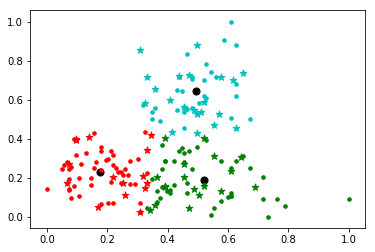

In [26]:
# Code to plot the graph below

for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='o', color='k', s=50)

for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='.', color=color, s=50)

for unknown in xtest:
    classification = predict(unknown,centroids)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=50)